# Exercise: Data Science for Responsible Decision Making


## Introduction

Please refer to the instructions provided in the exercise description (.pptx file) as the source of truth. You may this notebook as a guide to attempt the exercises in a Jupyter Notebook format using the tRBS open-source code package.

### Summarized instructions:  
 1. **Start with the assignment description:** Carefully read the exercise description instructions (in the .pptx file).  <br><br>
2. **Prepare the template:** Follow the instructions in the exercise description (Slide 13). To help you get started, we have prepared a starter template for you under **StarterTemplate.xlsx**.  
	   i. Fill in the missing fields in the sheets `key_outputs`, `decision_makers_options` and `theme_weights`.   <br><br>
 3. **Save the file:** After you have prepared the template, save it in **data/StarterTemplate/xlsx/**.  <br><br>
 4. **Run through the notebook** and note your observations.  <br><br>

----
**After** you have run through the notebook once:

 5. **Make your changes** in the **theme weights** (for the economic growth theme) in the template as per the instructions (slide 13), re-run the notebook and note the differences in your results.  <br><br>
 6. **Add the relationship** (see slide 14) between the investment in clean drinking water and the return on investment (in `scenarios`) and the income increase for low income families (in `fixed_inputs`) along with their respective dependencies (in `dependencies`) and **re-run through the notebook**.  <br><br>
 7. **Change the weights** (see slide 15) in `scenario_weights`, `theme_weights` or `key_output_weights` as per your preferences and re-run the analyses and note the differences in your results.<br><br>
 8. **(BONUS)** Complete the challenges for **calculating** the weighted appreciations and **plotting** them toward the end of the notebook.


  
### `TheResponsibleBusinessSimulator` class  
In order to work with the Responsible Business Simulator model, we will work with the ```TheResponsibleBusinessSimulator``` class. This class can be found in **core/trbs.py**. This class takes three input values: (i) the folder where data of the case can be found, (ii) the format of the data (options: xlsx, json, csv) and (iii) the name of the case.





In [1]:
from pathlib import Path
from core.trbs import TheResponsibleBusinessSimulator

# Specify your case and format. 
path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'FinalTemplate'

case = TheResponsibleBusinessSimulator(path, file_format, name)

Let's see how ```case``` looks currently:

In [2]:
print(case)

Case: FinalTemplate (xlsx) 
Data location: C:\Users\ymathradas001\PycharmProjects\pythonProject2\trbs\model\data 
Input data: 
 First .build() a case to import data


Currently, it is rather empty. To get the input data, we will first need to ```build``` our case.

In [3]:
case.build()
print(case)

Creating 'FinalTemplate'
Hierarchy calculated in 4 iterations
Case: FinalTemplate (xlsx) 
Data location: C:\Users\ymathradas001\PycharmProjects\pythonProject2\trbs\model\data 
Input data: 
 configurations
	['use_theme_weights']

configuration_value
	[0]

key_outputs
	['Return on investment' 'Decrease in biodiversity\xa0' 'CO2 emission'
 'Income growth for low-income families']

key_output_theme
	['Economic growth' 'Sustainable consumption and production'
 'Climate change' 'Reduced inequality']

key_output_monetary
	[0 0 0 0]

key_output_smaller_the_better
	[0 1 1 0]

key_output_linear
	[1 1 1 1]

key_output_automatic
	[1 1 1 1]

key_output_start
	[nan nan nan nan]

key_output_end
	[nan nan nan nan]

key_output_threshold
	[nan nan nan nan]

decision_makers_options
	['Equal spread' 'Focus on clean drinking water' 'Focus on cryptocurrency'
 'Focus on pig farms' 'Focus on wind turbines']

internal_variable_inputs
	['Investment in clean drinking water' 'Investment in cryptocurrency'
 'Inves

---
### (Ideas for extra data science)
- Change the weights from within the python code
- Fix the constraint with the DMO in the code
- Some error (DONT PANIC)

### (Optional) Change the parameters from this notebook (instead of the Excel template)
- Fill in the missing fields in the `key_outputs`, `decision_maker_options` and the `theme_weights`.
- All the input parameters are stored in the `dict` object `case.input_dict` created when the case was built.
- Hint: You can access the `key_outputs` through `case.input_dict['key_outputs']`
- Could validate the inputs they have added (or maybe not?)

In [4]:
import numpy as np
def setParameterValue(sheet_name, first_param, second_param, value):
    if sheet_name == 'key_outputs':
        index = np.where(case.input_dict[sheet_name] == first_param)
        case.input_dict["_".join([sheet_name[:-1], second_param])][index] = value
        
    if sheet_name == 'decision_makers_options':
        index1 = np.where(case.input_dict[sheet_name] == first_param)
        index2 = np.where(case.input_dict['internal_variable_inputs'] == second_param)
        case.input_dict['decision_makers_option_value'][index1, index2] = value

In [5]:
# setParameterValue('key_outputs', 'Income growth for low-income families', 'theme', 'Reduced Inequality')
# setParameterValue('decision_makers_options', 'Focus on cryptocurrency', 'Investment in cryptocurrency', 550000)

---

### Calculate key output values

Now that we have a decent set-up of our case, we can `evaluate` it. Cases are evaluated using the following iterative four-step process.

1. `evaluate_single_dependency` is the smallest calculation step. It takes both arguments from a **single dependency row** and applies the provided operator. This is calculated for a fixed decision makers option (dmo) and fixed scenario. <br>
_e.g. this function will calculate 'Effect of training' as 'Investment' / 'Effectiveness'. The fixed decision makers option and fixed scenario is used (when needed) to find the correct values for the internal variable ('Investment') and external variable ('Effectivess')._
<br>

2. `evaluate_all_dependencies` calculates all singular calculated dependencies to evaluate the full outcome for a case for a fixed decision makers option and fixed scenario. <br>
_e.g. this function will calculate the values of the key outputs for the 'Base case' with a 'Focus on clean drinking water'._
<br>

3. `evaluate_selected_scenario` calculates all full outcomes for a case for **all decision makers options** and single given scenario. <br>
_e.g. this function will calculate a set of values of the key outputs for the 'Base case' for each option that is available to the decision makers, that is, one set for 'Focus on water recycling', one set for 'Focus on training' and one set for 'Equal spread'._
<br>

4. `evaluate_all_scenarios` calculates all sets of key output values for **all decision makers options** and **all scenarios**. 

The process is iterative. So, when calling `evaluate` step 4 is called that will call the other functions. This process is visualised below:

![Process Visual](images/process_visual.png)

In [6]:
case.evaluate()

- Evaluated 'Base case' successfully for all decision makers options!
- Evaluated 'Optimistic' successfully for all decision makers options!
- Evaluated 'Pessimistic' successfully for all decision makers options!


The `evaluate` function creates an output dictionary (`output_dict`) for our `case`. This dictionary contains all the results of our case and is structured as a nested dictionary with the following structure: 

{'Scenario A': <br>
   { <br>
    'Decision Makers Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        }<br>
    'Decision Makers Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [7]:
case.output_dict['Base case']

{'Equal spread': {'key_outputs': {'Return on investment': 639000.0,
   'Decrease in biodiversity\xa0': 1446.4843587014504,
   'CO2 emission': 818187.1282922685,
   'Income growth for low-income families': 7301.401869158879}},
 'Focus on clean drinking water': {'key_outputs': {'Return on investment': 383400.0,
   'Decrease in biodiversity\xa0': 867.8907450390521,
   'CO2 emission': 1356366.8224299066,
   'Income growth for low-income families': 4380.841121495328}},
 'Focus on cryptocurrency': {'key_outputs': {'Return on investment': 783400.0,
   'Decrease in biodiversity\xa0': 867.8906812208703,
   'CO2 emission': 930912.2769753612,
   'Income growth for low-income families': 4380.841121495328}},
 'Focus on pig farms': {'key_outputs': {'Return on investment': 463400.0,
   'Decrease in biodiversity\xa0': 3152.0027647535812,
   'CO2 emission': 494557.1367884452,
   'Income growth for low-income families': 16063.084112149532}},
 'Focus on wind turbines': {'key_outputs': {'Return on investm

### Process key output values
Now that we have evaluated the dependencies, we can start to compare the key outputs. In order to do this we `appreciate` the key output values in our case. A five-step approach is introduced when appreciating the outputs:
1. `appreciate_single_key_output` transforms a key output value into an **appreciated value**. This is done by a (non)-linear appreciation based on the minimum and maximum values of that specific key output throughout the case (so based on values of key outputs in all scenarios and decision makers options). For each (scenario, decision makers option) combination
<br>

2. `apply_weights` applies theme and key output weights to the calculated appreciations under Step 1. These weights are model inputs determined based on strategic priorities. This function gives us a set of **weighted appreciations** of the key outputs for each (scenario, decision makers option) combination. 
<br>

3. (**NOT YET IMPLEMENTED**) `decision_makers_option_appreciations` aggregates the weighted appreciations of key outputs into a single **aggregated appreciation** per decision makers option and scenario.
<br>

4. (**NOT YET IMPLEMENTED**) `apply_scenario_weights` applies scenario weights to the calculated appreciation under Step 3. This function gives us a value of **scenario weighted appreciations** for each decision makers option and scenario.
<br>

5. (**NOT YET IMPLEMENTED**) `scenario_appreciations` aggregates the scenario weighted appreciations into a single value for each decision makers option.

In [8]:
case.appreciate()

Key output values have been processed | Appreciated, weighted & aggregated


The `appreciate` function extends our existing output dictionary with information about the appreciation & weighted appreciation. The extended structure looks as follows:

{'Scenario A': <br>
   { <br>
    'Decision Makers Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        **'appreciations': {'Key Output X': value, ..}<br>
        'weighted_appreciations': {'Key Output X': value, ..}**<br>
        }<br>
    'Decision Makers Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [9]:
case.output_dict

{'Base case': {'Equal spread': {'key_outputs': {'Return on investment': 639000.0,
    'Decrease in biodiversity\xa0': 1446.4843587014504,
    'CO2 emission': 818187.1282922685,
    'Income growth for low-income families': 7301.401869158879},
   'appreciations': {'Return on investment': 47.21045227627839,
    'Decrease in biodiversity\xa0': 74.66877034397974,
    'CO2 emission': 62.184628524306916,
    'Income growth for low-income families': 25.0},
   'weighted_appreciations': {'Return on investment': 11.802613069069597,
    'Decrease in biodiversity\xa0': 18.667192585994936,
    'CO2 emission': 15.546157131076729,
    'Income growth for low-income families': 6.25}},
  'Focus on clean drinking water': {'key_outputs': {'Return on investment': 383400.0,
    'Decrease in biodiversity\xa0': 867.8907450390521,
    'CO2 emission': 1356366.8224299066,
    'Income growth for low-income families': 4380.841121495328},
   'appreciations': {'Return on investment': 45.04700172500478,
    'Decrease 

### Visualization of output
Having evaluated and appreciated the full case, it is time to start creating some visuals. We will do this using the generated `output_dict` and the `visualize` function. This function uses a display format (currently 'table' or 'barchart') and the key of the result as stored in `output_dict` (e.g. `key_outputs` or `weighted_appreciations`).

Visualizations are generated using the following rules:

- `table`: 2- or 3-dimensional tables. Rows contain scenarios and/or key outputs (both if 3-dimensional, choose one if 2-dimensional). Columns are decision makers options. 
- `barchart`:
    - 3-dimensional is not possible. Specify a scenario if the `key` in the `output_dict` is associated with three dimensions
    - 1 or 2-dimensional: decision makers options are always on the horizontal axis. For 2-dimensional barchart it can be either `stacked` or `dodged`. 

In [10]:
case.visualize('table', 'key_outputs', scenario='Base case')

Comparing key outputs for each decision makers option can become difficult: the ranges of the three key outputs vary wildly. For better comparisons, we can therefore look at the weighted appreciations:

In [11]:
case.visualize('table', 'weighted_appreciations', scenario="Base case")

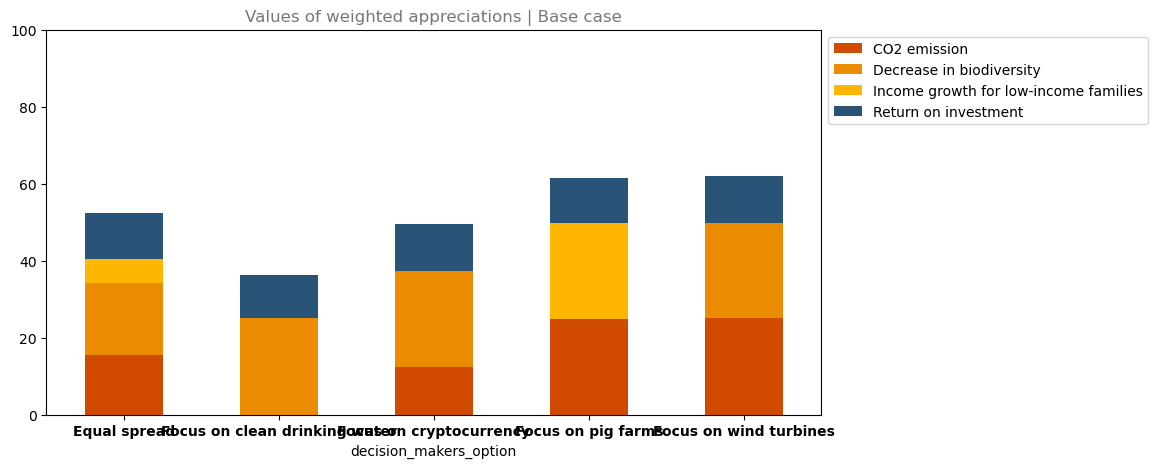

In [12]:
case.visualize(visual_request='barchart', key='weighted_appreciations', scenario="Base case")

---
### (Optional) 
#### Task 1: Calculate the weighted appreciations from appreciations for a given scenario

The weighted appreciations is simply a product of the weights of a respective key output with its associated appreciation.
- For the calculation of the `Weights` ($w$) we first define the following variables:
  - $w_{ko}$ or `weights["key_output"]`: the weight of the given key output (user-input)
  - $w_{kos|t}$ or `weights["sum_within_theme"]`: the sum of the weights of all key outputs with the same theme as the 
  given key output
  - $w_{t}$ or `weights["theme"]`: the weight of the theme of the given key output (user-input)
  - $w_{ts}$ or `weights["sum_theme"]`: the sum of the weights of all themes 
- The weight for a given key output is then calculated as: $$w = \frac{w_{ko}}{w_{kos|t}} \cdot \frac{w_t}{w_{ts}}$$ 


You can use the helper function that we have provided to obtain the `appreciation` DataFrame for each key value. The following DataFrame called `goal_df` is what you must calculate from the `apprec_df`.

Note: You must have run the `case.appreciate()` method for the `case.output_dict` to contain the appreciated values.

In [28]:
# Helper functions

import pandas as pd

def format_data_as_df(data: dict, scenario: str, key: str):
    """
    Format data from a nested dictionary as a pandas DataFrame for the
    specified scenario and key.

    Parameters:
    data (dict): Nested output dictionary containing the data.
    scenario (str): The scenario from the data to extract.
    key (str): The key within each scenario to extract.

    Returns:
    pandas.DataFrame: Formatted DataFrame containing the specified data.
    """
    
    dmos = list(data[scenario].keys())
    keys = list(set([key for dmo in dmos for key in data[scenario][dmo]]))  
    
    ## TODO: Add assert here
    if scenario not in data or key not in keys:
        return None  # Handle invalid scenario or key
    
    multi_df = pd.DataFrame.from_dict({(i,j,k): data[i][j][k] 
                           for i in data.keys() 
                           for j in data[i].keys()
                           for k in data[i][j].keys()}, orient='index')
    df = multi_df.xs(key=(scenario, key), level=[0, 2])
    return df

In [29]:
# Starter: Appreciations
apprec_df = format_data_as_df(case.output_dict, scenario='Base case', key='appreciations')
apprec_df

,Return on investment,Decrease in biodiversity,CO2 emission,Income growth for low-income families
Equal spread,47.210452,74.668770,62.184629,25.0
Focus on clean drinking water,45.047002,99.999997,0.000000,-0.0
Focus on cryptocurrency,48.432683,100.000000,49.159664,-0.0
Focus on pig farms,45.724138,0.000000,99.578850,100.0
Focus on wind turbines,49.637986,98.675084,100.000000,-0.0


In [30]:
# Goal: Weighted Appreciations
goal_df = format_data_as_df(case.output_dict, scenario='Base case', key='weighted_appreciations')
goal_df

,Return on investment,Decrease in biodiversity,CO2 emission,Income growth for low-income families
Equal spread,11.802613,18.667193,15.546157,6.25
Focus on clean drinking water,11.261750,24.999999,0.000000,-0.00
Focus on cryptocurrency,12.108171,25.000000,12.289916,-0.00
Focus on pig farms,11.431035,0.000000,24.894713,25.00
Focus on wind turbines,12.409496,24.668771,25.000000,-0.00


#### (Solution) Task 1:

In [33]:
def apply_weights_single_key_output(weights: dict) -> float:
    """
    This function calculates the weight for a single key output.
    :param weights: dictionary containing necessary parameters. Should contain:
        - 'sum_within_theme': sum of all weights of all key outputs with the same theme
        - 'sum_theme': sum of the theme weights (theme weights are user input)
        - 'key_output': weight of this key_output
        - 'theme': weight of the theme of the key_output
    :return: the calculated weight of the key output
    """
    # 'sum_within_theme' or 'sum_theme' cannot be 0
    if not weights["sum_within_theme"] or not weights["sum_theme"]:
        return 0
    return (weights["key_output"] / weights["sum_within_theme"]) * (weights["theme"] / weights["sum_theme"])

def calculate_weights(input_dict: dict) -> list:
    """
    This function creates a weights list for all key outputs.
    :return: list with weights for all key outputs
    """
    key_output_themes = input_dict["key_output_theme"]
    weights = input_dict["key_output_weight"]
    theme_weights = input_dict["theme_weight"]

    adjusted_weights = []
    for index, _ in enumerate(input_dict["key_outputs"]):
        theme = key_output_themes[index]
        # Find all key outputs weights that share the same theme as 'key_output' (>= 1)
        theme_indices = [
            theme_index for theme_index, theme_value in enumerate(key_output_themes) if theme_value == theme
        ]
        weights_within_theme = weights[theme_indices]
        # Find theme weight of 'key_output' - as a number instead of array
        theme_weight = theme_weights[np.where(input_dict["themes"] == theme)[0]][0]

        weights_dict = {
            "key_output": weights[index],
            "theme": theme_weight,
            "sum_theme": np.sum(theme_weights),
            "sum_within_theme": np.sum(weights_within_theme),
        }
        adjusted_weights.append(apply_weights_single_key_output(weights_dict))

    return adjusted_weights
    

In [36]:
weights_list = calculate_weights(case.input_dict)

# Element wise multiplication
apprec_df*weights_list

,Return on investment,Decrease in biodiversity,CO2 emission,Income growth for low-income families
Equal spread,11.802613,18.667193,15.546157,6.25
Focus on clean drinking water,11.261750,24.999999,0.000000,-0.00
Focus on cryptocurrency,12.108171,25.000000,12.289916,-0.00
Focus on pig farms,11.431035,0.000000,24.894713,25.00
Focus on wind turbines,12.409496,24.668771,25.000000,-0.00


#### Task 2: Make the visual
The `Visualize` class has the methods built in to construct the plot you see below. But we want you to recreate a similar visual using the data obtained from the `case.output_dict`. In addition to recreating the plot, you get bonus points if you 1) Change the colors to the Nyenrode color scheme and 2) Add y-value labels to each barchart.

Your task is to plot the `weighted_appreciations` for a particular scenario that you obtained from Task 1.
If you want to start with this task first you can use the helper function `format_data_as_df` we have provided to help you get started.

In [38]:
result_df = format_data_as_df(case.output_dict, 'Base case', 'weighted_appreciations')
result_df

,Return on investment,Decrease in biodiversity,CO2 emission,Income growth for low-income families
Equal spread,11.802613,18.667193,15.546157,6.25
Focus on clean drinking water,11.261750,24.999999,0.000000,-0.00
Focus on cryptocurrency,12.108171,25.000000,12.289916,-0.00
Focus on pig farms,11.431035,0.000000,24.894713,25.00
Focus on wind turbines,12.409496,24.668771,25.000000,-0.00


#### (Solution): Task 2

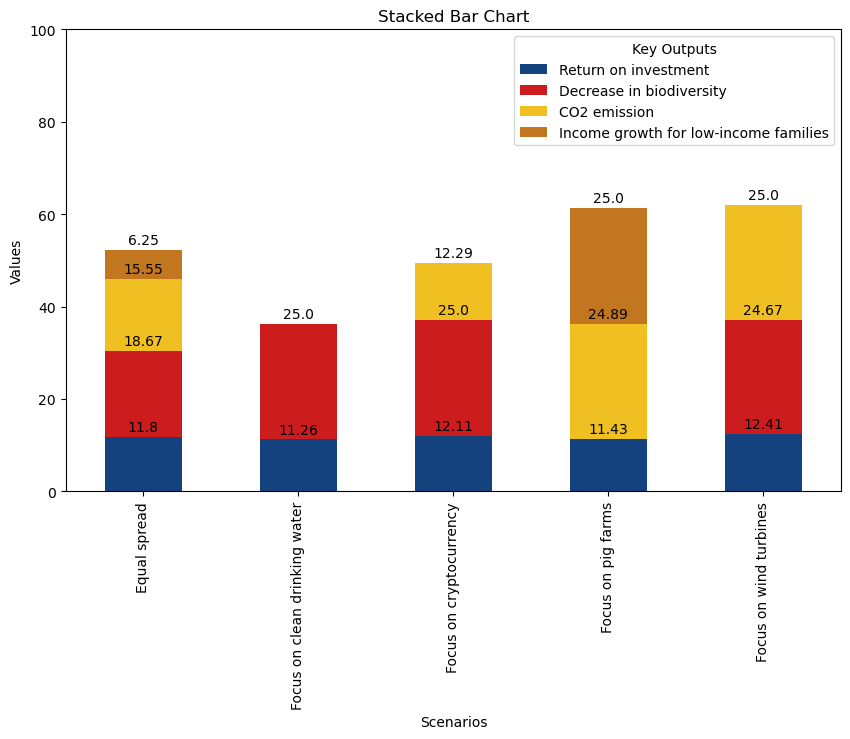

In [40]:
from matplotlib import pyplot as plt

COLOR_LIST = ['#13427f', '#cc1c1e', '#f0c022', '#c27620', '#e3c874']
# Plot the stacked bar chart
ax = result_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=COLOR_LIST)
plt.title('Stacked Bar Chart')
plt.xlabel('Scenarios')
plt.ylabel('Values')

# Add y-value labels on each non-zero bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2, labels=[f'{round(val, 2)}' if val != 0 else '' for val in container.datavalues])
    
# Add a legend
plt.legend(title='Key Outputs')

# Set y-limit to (0, 100)
plt.ylim(0, 100)

# Display the plot
plt.show()

### (Ideas for extra data science)
- Change to Nyenrode colors
- Add labels to the grpahs. Add the number/total appreciation value
- Use an alternative way of visualization
- Subplots with all the cases next to each other
- Calculate the `weighted_appreciations`
---

### Transforming the case into a different format (optional)
We can transform a case into a different format. The `transform` function creates a folder named as the file extension and stores this at the provided location (here: in the folder where the repo is stored)

In [ ]:
output_path = Path.cwd().parent.parent
case.transform(output_path, "json")
# case.transform(output_path, "xlsx")
case.transform(output_path, "csv")